Começando a limpeza de dados (1º visão)
<p>Porque limpar os dados? A principal resposta é que dados com problemas acabam gerando resultados com problemas, seja para analise de dados ou machine learning. </p>

* 1 Verificar categorias dos dados
* 2 Verificar dados Outvalues
* 3 Verificar dados Duplicados

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Categoria dos dados - .dtypes( ) - .info( ) - .str. - .astype( )
<p> A primeiro momento o que devemos checar são as categorias em que os dados do DataFrame se encontram, sendo elas: (str, int, float, bool, datetime, etc), dados em categorias erradas podem apresentar resultados errados.</p>

In [3]:
df = pd.DataFrame({'produto':['prod1','prod2','prod3'],
            'preco':['2300$','2200$','4000$'],
             'quantidade':[1,3,2]})
df

,produto,preco,quantidade
0,prod1,2300$,1
1,prod2,2200$,3
2,prod3,4000$,2


<p> Na situação do DATASET acima, por receber <b>$</b> o dado é considerado <b>string</b>, então o pandas o considera categorico, sendo assim impossivel de realizar contas como <b>.sum( )</b>, <b>.mean( )</b> etc. </p>

```python
DF.dtypes() 
ou
DF.info()
```

In [4]:
df.dtypes

produto       object
preco         object
quantidade     int64
dtype: object

<p> Podemos utilizar o comando strip visto como método de <b>STRING</b> com auxilio do <b>.str</b> para removermos a formatação com $ na nossa coluna </p>

```python
df['col'] = df['col'].str.strip('$')
```

In [5]:
df['preco']=df['preco'].str.strip('$')
df

,produto,preco,quantidade
0,prod1,2300,1
1,prod2,2200,3
2,prod3,4000,2


<p> Além disso, sempre que tivermos problemas com strings, podemos utilizar do <b>str</b> e seu metodos para solucionar os problemas.</p> 

```python
df['col'] = df['col'].str.lower()
df['col'] = df['col'].str.upper()
```

## Modificando dados - .astype( )
<p> Feito isso podemos utilizar o comando <b>astype( ) </b> para modificar todos os dados de uma coluna num DATASET </p>

```python
df['col'] = df['col'].astype('int')
```

In [9]:
df['preco'] = df['preco'].astype('int')

## Selecionando dados - select_dtypes()
<p> Seleciona apenas colunas de determinados tipos de dados. </p>

```python
df.select_dtypes('int')
```

In [12]:
df.select_dtypes('int')

,preco,quantidade
0,2300,1
1,2200,3
2,4000,2


# Buscando sentido dos dados - .drop( ) - .to_datetime( ) - .strftime( )
<p> Durante a analise de dados, podemos encontrar muitos dados sem sentido, por exemplo, se temos um sistema de avaliações com <b>nota máxima 10</b>, porque existiria um dado com <b>nota máxima 11</b> podemos com isso utilizar o método drop aninhado com uma clausula booleana para remover esses determinados dados. </p>

Podemos usar o comando <b>.drop( )</b> da seguinte maneira:

```python
df.drop(df[df['coluna']>10].index, axis=0, inplace = True)
```

<h6> (o drop elimina o determinado eixo escolhido, sendo coluna para axis=1 e linha para axis=0, além disso usamos o inplace para que o DataSet se sobescreva.) </h6>


## Dados correlacionados com datas

<p> Para dados com datas, as modificações também são necessárias, é possível que seja necessário a eliminação de datas antes do dia de <b>hoje</b> ou outros booleanos que se correlacionem com os tipos de dados desejados. </p>

* 1 Importamos o <b>datetime</b>
```
import datetime as dt
```
* 2 Colocamos os dados em datatime
```python 
df['col'] = pd.to_datetime(df['col'])
```
* 3 Colocamos eles em um padrão caso eles já não tenham um definido
```python 
df['col'] = df['col'].strftime('%D-%M-%Y') 
```
* 4 Fazemos as alterações necessárias, nesse caso 
```python
df.drop(df[df['col'] > dt.date.today()].index, inplace = True)
```

# Tratando Outliers
<p> Para tratar outliers existem diversos métodos, alguns desses são o método de tukey, método do desvio padrão e metódo do z-score. </p>

Método de tukey, tem como objetivo separar os dados por meio de seus quantis, levando em conta que a distribuição seja uma distribuição gaussiana.

Criamos limites dos quantis Q3 = 75% | Q1 = 25% 

E utilizamos o valor 1.5 para representar 2.7 desvios padrões da média;

Se utilizassemos o valor 1.0 pegariamos os dados com 2.025 desvios padrões da média;

Se utilizassemos o valor 3.0 pegariamos os dados com 3.375 desvios padrões da média;

Para se ter exatos 3 desvios padrões colocariamos a constante valendo 1.7;

In [51]:
base_outlier =  [20,22,24,19,18,25,44]

11.0 limite inferior
33.0 limite superior
8 desvio padrão
25 media
22.0 mediana


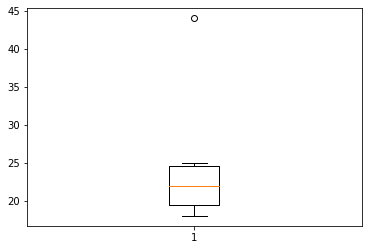

In [52]:
q25, q50, q75 = np.percentile(base_outlier,[25,50,75])

iqr = q75-q25

limit_min = q25 - 1.7*(iqr)
print(limit_min,'limite inferior')

limit_max = q75 + 1.7*(iqr)
print(limit_max,'limite superior')

print(round(np.std(base_outlier)),'desvio padrão')
print(round(np.mean(base_outlier)),'media')
print(np.median(base_outlier),'mediana')
plt.boxplot(base_outlier);

Podemos utilizar essa formula num Dataset também

```python
q25, q50, q75 = np.percentile(concreto['Age (day)'],[25,50,75])
iqr = q75-q25
min = q25 - 1.5*(iqr)
max = q75 + 1.5*(iqr)
```

Lembrando que para distribuição Gaussiana levamos em conta.

* Cerca de 68,26% de todos os dados estão dentro de um desvio padrão (<σ) da média (μ);

* Cerca de 95,44% de todos os dados estão dentro de dois desvios padrão (2σ) da média (μ);

* Cerca de 99,72% de todos os dados estão dentro de três desvios padrão (<3σ) da média (μ);

* E os 0,28% restantes de todos os dados estão fora de três desvios padrão (>3σ) da média (μ);

* O primeiro e o terceiro quartis, Q1 e Q3, situam-se a -0,675σ e +0,675σ da média, respectivamente.

## Método Z-score
<p> O Método Z-score, tem como objetivo, identificar a distancia da média em desvios padrões dos nossos dados. </p>

In [54]:
base_outlier

[20, 22, 24, 19, 18, 25, 44]

In [55]:
distancias_std = [(x - np.mean(base_outlier))/np.std(base_outlier)\
                  for x in base_outlier]

In [56]:
distancias_std # Distancia da média de cada dado em desvios padrões

[-0.5522168221827439,
 -0.31062196247779356,
 -0.06902710277284316,
 -0.6730142520352191,
 -0.7938116818876944,
 0.05177032707963204,
 2.346921494276661]

In [58]:
np.where(np.array(distancias_std) >= 3)

(array([], dtype=int64),)

## Método MAD
<p> Outra opção mais sensível que o z-score quando as nossas amostras são pequenas e o desvio padrão não performa bem, é o desvio absoluto mediano, este por sua vez tem enfoque em ver dados muito afastados da distribuição mediana dos dados. </p>

<p> Como calcular o MAD </p>

In [87]:
# Calculando a mediana do array
base_outlier = np.array(base_outlier) 
mediana_base = np.median(base_outlier)
mediana_base

22.0

In [88]:
# Calculando o array abs mad
valores_para_mad = abs(base_outlier-mediana_base)
valores_para_mad

array([ 2.,  0.,  2.,  3.,  4.,  3., 22.])

In [89]:
# Calculando o cut off do mad assumindo que é uma distribuição normal
mad = np.median(valores_para_mad)* 1.4826 # Constante que assumme que a distribuição é normal
mad

4.4478

In [91]:
# Pontos outliers para analise mad
outliers_mad = (base_outlier-np.median(base_outlier))/mad
outliers_mad

array([-0.44966051,  0.        ,  0.44966051, -0.67449076, -0.89932101,
        0.67449076,  4.94626557])

In [93]:
# Podemos esperar que aproximadamente 95% dos pontos retirados de uma distribuição normal sejam mais do que 2 desvios padrão da média (e mediana) então vamos considerar 2 como cute off
np.where(np.array(outliers_mad) >= 3) # o ponto de indice 6 foi considerado um outlier

(array([6], dtype=int64),)

# Analisando dados duplicados - .duplicated( ) - .drop_duplicates( )

<p> Dados duplicados são responsáveis por aumento significativo de problemas quando utilizado em analises, mas então: </p>
<p>Como checar se existem dados duplicados?</p>

```python
#Vendo todos dados duplicados
df[df['col'].duplicated( subset = [], keep = [] )] 
```
<p> <b>Subset</b> = colunas que queremos checar se há duplicadas.</p>
<p> <b>Keep</b> = podendo ser 'last', 'first' ou False (indicando se a ultima a primeira ou todas linhas devem ser checadas)</p>
<p> Apos termos nossas colunas, podemos elimina-las, de maneira com que preservemos a integridade do nosso Dataframe. </p>

```python
#Eliminando todos dados duplicados
df.drop_duplicates(subset = [], keep = [])
```
<p> <b>Subset</b> = colunas que queremos deletar se há duplicadas.</p>
<p> <b>Keep</b> = podendo ser 'last', 'first' ou False (indicando se a ultima a primeira ou todas linhas devem ser apagadas)</p>
